<a href="https://colab.research.google.com/github/AndrewAmkreutz/DS5006-Machine-Learning-for-Engineering-and-Science-Applications/blob/main/My_CaseStudy_1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polymer Melt Flow Rate

This case study is based upon the excellent example below:

http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate

Along with its github repository:

https://github.com/APMonitor/pds

and license:

https://github.com/APMonitor/pds/blob/main/LICENSE

In particular, as described on the web page above:

Polymer properties such as density, melt index, and melt flow rate must be kept within tight specifications for each grade. This case study is to analyze polymer production data to predict melt flow rate.

**Background:** There are gas phase and liquid slurry reactors that create polymers (polyethylene, polypropylene, polystyrene, and others) from chemical building blocks known as monomers (C2=, C3=, C4=, iC5=, and others). A catalyst is injected with the monomers under carefully controlled temperature and pressure conditions to cause a reaction that grows the polymer chains. Hydrogen is a chain transfer agent to stop the growth of the polymer chain. If the polymer chains grow too long then the polymer is too viscous for manufacturing in films, injection molding, or other applications.

This case study focuses on measurements of Melt Flow Rate (MFR) to determine the polymer viscosity based on reactor conditions. An accurate model is desirable so that the infrequent lab samples (every 2-8 hours) are supplemented with a virtual and continuous "soft sensor". A model that runs in real-time simulation alongside the physical reactor is called a digital twin.

| Label | Data File Tag   | Description |
|------|------|------|
|   Time  | | Timestamp of the measurements|
|   C3  | 513FC31103.pv| Propylene (C3=) Feed Rate (kg/hr)|
|   H2R  | 513HC31114-5.mv| Hydrogen to C3= Ratio|
|   Pressure  | 513PC31201.pv| Reactor Pressure (bar)|
|   Level  | 513LC31202.pv| Reactor Bed Level (m)|
|   C2  | 513FC31409.pv| Ethylene (C2=) Flow (kg/hr)|
|   Cat  | 513FC31114-5.pv| Catalyst Feed Rate (kg/hr)|
|   Temp  | 513TC31220.pv| Reactor Temperature|
|   MFR  | MFR| Melt Flow Rate (gm/10min)|

**References**

Hedengren, J. D. (2021, December 16). Polymer Melt Flow Rate, Machine Learning for Engineers. Retrieved from http://apmonitor.com/pds/index.php/Main/PolymerMeltFlowRate



# Naive solution

### Import Polymer MFR Data


Don't worry, the data has been cached on the github page for this class so you can access it directly by url. Easy!

In [ ]:
url = 'https://raw.githubusercontent.com/rcpaffenroth/DS5006-Machine-Learning-for-Engineering-and-Science-Applications/main/data/polymer_reactor.txt'

Let's read the data through pandas.  It would be great to get to know pandas. It is an important tool for Data Science in Python.

![Book cover](https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg)

https://images-na.ssl-images-amazon.com/images/I/51HuYEwAl2L._SX258_BO1,204,203,200_.jpg

In [ ]:
import pandas as pd

# We can pass the url directly into pandas read_csv file
# to read a dataframe directly
data = pd.read_csv(url)

In [ ]:
data

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-18 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-18 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-18 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-18 1:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-18 3:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3
...,...,...,...,...,...,...,...,...,...
2559,12-10-18 9:45,24437.988,0.185,31.025928,77.189499,24022.730,0.103966,81.783371,12.3
2560,12/17/2018 16:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5
2561,12/17/2018 18:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
2562,12/27/2018 5:45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.7


What does all this mean? 513FC31103.pv	513HC31114-5.mv	513PC31201.pv	513LC31202.pv	513FC31409.pv	513FC31114-5.pv	513TC31220.pv.   What do the column labels mean?  You probably want to map them to something more meaningful.

![?](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR2W-Aq7YoFONiyUsix1x8wXnlesgqEyDShTA&usqp=CAU)

In [ ]:
data = data.set_axis(['Time','C3','H2R','Pressure','Level','C2','Cat','Temp','MFR'], axis=1)
data.dropna()

,Time,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922
...,...,...,...,...,...,...,...,...,...
2555,21437.066,0.180,31.306507,76.762871,13607.478,0.081950,79.421646,11.8,2.468100
2556,25108.557,0.180,29.496073,76.608147,43186.836,0.131283,81.863571,11.2,2.415914
2557,20050.275,0.250,31.061733,76.629868,31100.949,0.094293,80.764282,11.4,2.433613
2558,21003.520,0.185,27.864731,77.518692,52186.004,0.137511,83.706100,13.5,2.602690


In [ ]:
data

,Time,C3,H2R,Pressure,Level,C2,Cat,Temp,MFR
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4,1.223775
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2,1.163151
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2,1.163151
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1,1.131402
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3,1.193922
...,...,...,...,...,...,...,...,...,...
2555,21437.066,0.180,31.306507,76.762871,13607.478,0.081950,79.421646,11.8,2.468100
2556,25108.557,0.180,29.496073,76.608147,43186.836,0.131283,81.863571,11.2,2.415914
2557,20050.275,0.250,31.061733,76.629868,31100.949,0.094293,80.764282,11.4,2.433613
2558,21003.520,0.185,27.864731,77.518692,52186.004,0.137511,83.706100,13.5,2.602690


Nice, now I know what they are. 🙂

## Regression Modeling

Now, we have the data and we know what they are. We learned a lot from Randy's 🧙 lecture and can't wait to try the machine learning algorithms. Let's start.

### Divide Data

What is the first step? Wow, Randy 🧙  said we need to divide the training set and the test set.

"Data is divided into train and test sets to separate a fraction of the rows for evaluating classification or regression models. A typical split is 80% for training and 20% for testing, although the range depends on how much data is available and the objective of the study."

The `train_test_split` is a function in `sklearn` for the specific purpose of splitting data into train and test sets.

```python
from sklearn.model_selection import train_test_split
train,test = train_test_split(ds, test_size=0.2, shuffle=True)
```

There are options such as `shuffle=True` to randomize the selection in each set.

One of those arguments is `random_state`; this argument, when set to a value, determines which rows go into the train and test splits. Make a mental note of the value we set, we may see it again later in the notebook! 🧙

In [ ]:
from sklearn.model_selection import train_test_split

# note how we set the random_state
train,test = train_test_split(data, test_size=0.2, shuffle=True, random_state=1)

Can't wait any longer to run the model?


#### Run model
Let's try linear regression using sklearn!

In [ ]:
from sklearn import linear_model
method = linear_model.LinearRegression()

What columns are used as features? What columns are used as labels?
Don't know? Then let's use them all first, except for time, since time is not important in this case.

**Features：**`C3, H2R, Pressure, Level, C2, Cat, Temp`

**label：** `MFR`


In [ ]:
# We call method.fit() to learn the parameters of our network
# to the specific data
model = method.fit(
    X = train[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),
    y = train['MFR'].to_numpy())

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

ValueError: Input contains NaN????

![?](https://www.memecreator.org/static/images/memes/4724747.jpg)

Wow! We forgot to check if there are any null values in the dataset. 😞


`data.isnull()`  is used to check if there is null value in the dataset. We can sum them by using sum().

`data.info()` and `data.describe()` are usually used to check the properties and basic statistics of the data.

In [ ]:
# Let's check how many total missing values exist in our training set
train.isnull().sum().sum()

In [ ]:
# Let's do the same for the test set we made
test.isnull().sum().sum()

In [ ]:
# use train.info() to get each column's number of non-missing values (Non-Null Count)
# Note: train.info() is also useful to see what kind a data type (Dtype) pandas
  # has encoded the columns. Sometimes pandas might mistakenly think a column of numbers
  # is actually a column of strings, so always check beforehand!
train.info()

In [ ]:
train.describe()

Yes, null values do exist in the dataset, let's delete them first.

`data.dropna()` is used to remove the rows that contain at least one null value.

In [ ]:
# assign new variables to versions of the data with no
# missing values
train_dropna = train.dropna()
test_dropna = test.dropna()

In [ ]:
train_dropna.isnull().sum().sum()

In [ ]:
test_dropna.isnull().sum().sum()

Now, let's try to run the model again!

In [ ]:
model = method.fit(
    X=train_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),
    y=train_dropna['MFR'].to_numpy())

Great!!! The model was successfully fit！ 🙂 Now, we can evaluate the performance on test set.

In [ ]:
from sklearn.metrics import mean_squared_error
r2 = method.score(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy(),test_dropna['MFR'].to_numpy())
mse = mean_squared_error(method.predict(test_dropna[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']].to_numpy()), test_dropna['MFR'].to_numpy())

print('R^2: ' + str(r2))
print('mse: ' + str(mse))

Ok, we already see things are interesting.  There are two different metrics (R^2 and mse)!   Hmmm....

## **Question 1** **(10 points)**

**Part 1 (5 points)**

What do R^2 and mse mean? Which is better for describing the performance of your algorithm?  Why?

__Answer__: PROVIDE YOUR ANSWER HERE

**Part 2 (5 points)**  

Try different variables to fit the model and test its performance.   What do you notice?  Are some worse and some better?

Hint:
`model = method.fit(train_dropna[['Your selected variable 1', 'Your selected variable 2']].to_numpy(),train_dropna['MFR'].to_numpy())`

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# Solution with Feature Engineering

How did you choose the variables? Why use these variables instead of others?

![?](https://media.makeameme.org/created/its-a-feature-5b167b.jpg)

How about we create a heatmap to show the correlation between the variables?

In [ ]:
# import plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

Still remember? Removing null values.

In [ ]:
data = data.dropna()

In [ ]:
# Drop the Time column in data
data = data.drop(['Time'], axis=1)

we can create a heatmap using `seaborn.heatmap()`

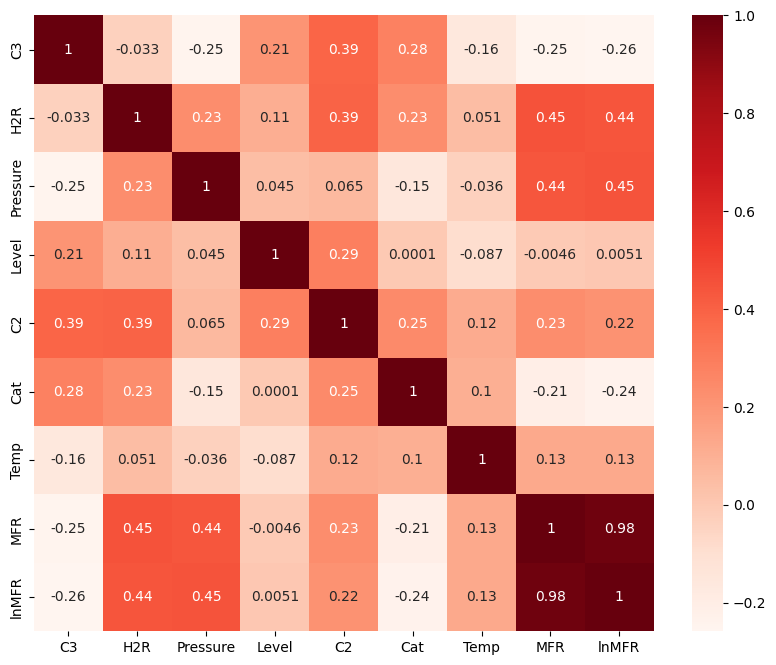

In [ ]:
plt.figure(figsize=(10,8))
cor = data.corr()
sns.heatmap(cor, annot=True,cmap=plt.cm.Reds)
plt.show()

## **Question 2** **(20 points)**

**Part 1 (5 points)**
What does correlation mean?

__Answer__: PROVIDE YOUR ANSWER HERE

**Part 2 (10 points)**
What are your observations? Which variables are strongly correlated with `MFR` and which variables are weakly correlated with `MFR`?

__Answer__: PROVIDE YOUR ANSWER HERE


**Part 3 (5 points)**
Is a variable with a large *negative* correlation useful or not?

__Answer__: PROVIDE YOUR ANSWER HERE



### Pair Plot

A pair plot shows the correlation between variables.

```python
sns.pairplot(data)
```

It has bar distributions on the diagonal and scatter plots on the off-diagonal. A pair plot also shows a different color (`hue`) by category `w`. Pair plots show correlations between pairs of variables that may be related and gives a good indication of features (explanatory inputs) that are used for classification or regression. Generate your own pair plot of the data.

In [ ]:
sns.pairplot(data) # This will run for a little bit

### Joint Plot

Want to change the plot style? No problem! 👌

A joint plot shows two variables, with the univariate and joint distributions.

```python
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")
```

Generate your own joint plot with the data. Try `kind='reg'`, `'kde'`, and `'hex'` to see different joint plot styles.

In [ ]:
sns.jointplot(x='H2R',y='MFR',data=data,kind="kde")

### Data Analysis with `ydata-profiling` (formerly known as pandas-profiling)

ydata - Profiling is a data analysis tool for a more in-depth summary of the data than the `descibe()` function. [Install the package](https://docs.profiling.ydata.ai/latest/getting-started/installation/) with:

```python
pip install --user ydata-profiling[notebook]
jupyter nbextension enable --py widgetsnbextension
```

<!-- **This idea is important!** You will need to install more packages than Colab provides, and this is an example of doing that.

NOTE:  You need to restart the Kernel before proceeding. The install only needs to run once.  We will talk about this in class. -->

In [ ]:
# first need to uninstall a conflicting version of a package,
# then install ydata-profiling
#!pip uninstall typing-extensions -y
#!pip install -U ydata-profiling[notebook] typing-extensions==4.6.0

# this line allows to use cool interactive widgets with a notebook
# which we will see in action in a few code cells below
#!jupyter nbextension enable --py widgetsnbextension
!pip install ydata-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension


In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
# here we generate the big report
profile = ProfileReport(data, minimal=False)

ProfileReport takes a little time to render the results, please be patient. Next, we can view the report interactively with `profile.to_widgets()`

IMPORTANT NOTE: If you run the following cell and nothing appears, or you get some sort of warning message, try re-running the `profile = ProfileReport(data, minimal=False)` cell again, and then re-run `profile_to_widgets()` cell. The ProfileReport can be a little finicky with Colab.

In [ ]:
# This will make nice interface in the notebook
profile.to_notebook_iframe()

## **Question 3** **(10 points)**

Notice that the output of the previous cell is a collection of interactive tabs that contain useful information about our data. Expore the tabs to get familiar with why type of information is present.

Next, find the two most "relevant" variables to `MFR` and fit them with linear regression. Cut and paste their "Interaction" plots here.  Why do you think they are relevant?

Compare the results (r^2 and mse) using these variables with your previous experiments.

__Answer__: PROVIDE YOUR EXPLANATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

Tired of manually selecting variables? We can use the model to select best features (variables) automatically.

### Select Best Features

We can rank the features to determine the best set that predicts `MFR`.

```python
from sklearn.feature_selection import SelectKBest, f_regression
best = SelectKBest(score_func=f_regression, k='all')
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)
```

There is additional information on [Select K Best Features](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html).

In [ ]:
x=data[['C3', 'H2R', 'Pressure', 'Level', 'C2', 'Cat', 'Temp']]
z=data[['MFR']]

# These are various feature selection algorithms available
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pylab as plt

# First, instantiate the selection algorithm with the scoring criteria
# here is the documentation on the scoring criteria we selected:
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.f_regression.html#sklearn.feature_selection.f_regression
best = SelectKBest(score_func=f_regression, k='all')

# fit the selection algorithm on our data and return
# the f-statistic for each variable; the higher the score,
# the more "significant" the variable is
fit = best.fit(x,z)
plt.bar(x=x.columns,height=fit.scores_)

## **Question 4** **(10 points)**

Based on the above results, select the variables you think are related to `MFR` and fit them with linear regression. Compare the results with the previous experiments.  What do observe?

__Answer__: PROVIDE YOUR OBSERVATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# Solution with Feature Engineering + Data processing

The result of the model is not good enough? Still want to improve the performance further?

Randy 🧙 has a few questions for you. Are there any outliers in the data? Do all variables satisfy the assumptions of the linear model?


There are several graphical techniques to help detect outliers. A box or histogram plot shows outlying points. Make one now and examine it for outliers in each variable.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

Remove outliers by removing select rows such as with:

```python
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]
```

to keep only values of `H2R` (Hydrogen to Monomer ratio) that are between 0.01 and 0.7.

In [ ]:
data = data[data['H2R']<0.7]
data = data[data['H2R']>0.01]

Show the boxplot again to verify that the data set does not have the outliers you removed.

TypeError: ufunc 'divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

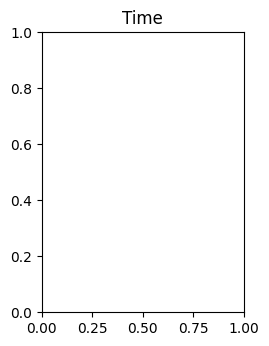

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(12,8))

# iterate over all of the columns
for i,c in enumerate(data.columns):
    if c != "MFR":
        plt.subplot(2,4,i+1)
        plt.title(c)
        plt.boxplot(data[c])
plt.show()

## **Question 5** **(10 points)**

Are there any other outliers in other variables? If so, please remove them.  How did you go about defining outliers?

__Answer__: PROVIDE YOUR ANSWER HERE

In [ ]:
# Provide any code for Question 5 here


# Important question!

Who controls the features that you process?  Are you stuck with the features provided by the original experiment?

**NO!!!!**

You have the power!  For example, any invertible transformation of the data can lead to new features or even new targets!   Actually any transformation whatsoever can lead to new features and targets.  Invertible just means that you can always recover your original data :-)

For example, we can apply log transformation to `MFR` and try and predict that instead.  Since the log is invertible, we can just predict that, get an prediction, and then apply the inverse of the log (the exponential map).

Create a new column for the natural log of (`MFR`) as `lnMFR`.

In [ ]:
import numpy as np
data['lnMFR'] = np.log(data['MFR'])

Check the results after log transformation

In [ ]:
sns.pairplot(data)

NameError: name 'sns' is not defined

## **Question 6** (10 points)

Pick one or two different functions and apply the to `MFR` and see if a transformed `MFR` is easier to predict.  Does transforming `MFR` change what inputs give good predictions?

__Answer__: EXPLAIN YOUR OBSERVATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

## **Question 7** (10 points)

Just like using transformations on the target (`MFR` in this case), you can use transformations on the inputs. Can you predict a transformed `MFR` from a set of transformed inputs?

Ok, things start to explode now with so many combinations. Just try a few :-)

__Answer__: EXPLAIN YOUR OBSERVATIONS HERE


In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

### One important transformation:  Scaling the data

Scale data with the `StandardScalar` from `scikit-learn`. This has the effect of making each column have zero mean and have unit variance.

```python
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
ds = s.fit_transform(data)
```

In [ ]:
from sklearn.preprocessing import StandardScaler
# like most methods in sklearn, we first instantiate the algorithm
s = StandardScaler()

# then can use a shortcut function to fit and transform the data of interest
ds = s.fit_transform(data)

ValueError: could not convert string to float: '04-05-18 19:45'

The value `ds` is returned as a `numpy` array so we need to convert it back to a `pandas` `DataFrame`.

```python
ds = pd.DataFrame(ds,columns=data.columns)
```

Re-use the column names from `data`.

In [ ]:
ds = pd.DataFrame(ds,columns=data.columns)

Now, we can check the results before/after scaling.

In [ ]:
data.describe()

In [ ]:
ds.describe()

Note how the mean of each column is practically equal to 0, and the standard deviation is practically equal to 1.



Next, we resplit the processed dataset into training and test set.

**Set a same random_state=1 to ensure the splitting of data in this step is the same as the splitting of data in the step earlier in the notebook.**

NOTE:  We will come back to this important point later 🧙

In [ ]:
from sklearn.model_selection import train_test_split
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1)

## **Question 8** (10 points)

Using the trained data to train the linear regression model, and report the results. Do models perform better? Why?

__Answer__: PROVIDE YOUR OBSERVATIONS OF RESULTS HERE

Hint:
```python
method = linear_model.LinearRegression()

model = method.fit(train_processed[['variable 1','variable 2']].to_numpy(),train_processed['MFR'].to_numpy())

r2 = method.score(test_processed[['variable 1','variable 2']].to_numpy(),test_processed['MFR'].to_numpy())

mse = mean_squared_error(method.predict(test_processed[['variable 1','variable 2']].to_numpy()), test_processed['MFR'].to_numpy())

print('R^2: ' + str(r2))

print('mse: ' + str(mse))
```

In [ ]:
# Your code here
# Your code here
# Your code here
# Your code here
# Your code here

# More advanced solution

Want to learn more? Let's look at a more advanced solution.

![?](https://i.imgflip.com/2l2aus.jpg)

Let's try a count plot to show the number of binned samples of `lnMFR`.

In [ ]:
sns.countplot(x=ds['lnMFR'])

In [ ]:
plt.plot(ds['C2'], ds['MFR'],'b.')

Note the interesting distribution of the data- it has a multimodal Gaussian distribution, in this case with two peaks.

Why not split the data into two parts, one for each Gaussian, then perform regression on each part separately? Will this regression perform better than a single regression algorithm for the full dataset?

First we split the data into two parts, then make train/test splits of each part with

In [ ]:
from sklearn.model_selection import train_test_split
lower_data = ds[ds['lnMFR']<0]
upper_data = ds[ds['lnMFR']>0]
lower_train,lower_test = train_test_split(lower_data, test_size=0.2, shuffle=True,random_state=1)
upper_train,upper_test = train_test_split(upper_data, test_size=0.2, shuffle=True,random_state=1)

In [ ]:
plt.plot(lower_data['Temp'], lower_data['MFR'],'b.')

In [ ]:
plt.plot(upper_data['Temp'], upper_data['MFR'],'b.')

Run the following code to test linear regression on the full data set as well as the subsets.

In [ ]:
def fits(data):
    X = ['Temp']
    y = ['MFR']
    # change this if you applied log transformation to your selected variables.
    method = linear_model.LinearRegression()

    model = method.fit(data[X].to_numpy(), data[y].to_numpy())

    MFR_pred = method.predict(data[X].to_numpy())
    r2_model = method.score(data[X].to_numpy(),data['lnMFR'].to_numpy())
    mse_model = mean_squared_error(method.predict(data[X].to_numpy()), data['lnMFR'].to_numpy())

    print('R^2: ' + str(r2_model))
    print('mse: ' + str(mse_model))

    plt.plot(data[X[0]], data[y],'b.', label="Real Data")
    plt.plot(data[X[0]], MFR_pred,'r.', label="Predictions")
    plt.legend()


    return

In [ ]:
fits(data)

In [ ]:
fits(lower_data)

In [ ]:
fits(upper_data)

## **Question 9** (10 points)

Explain what is going on here?  Was it ever a good idea to use linear regression on the whole dataset!?  In particular, what does it mean that the R^2 and mse changed so much?

__Answer__: PROVIDE YOUR ANSEWR HERE


## **Question 10** **($\infty$ points, since this is where you really learn stuff! :-)**

You can get as many points of extra credit as you like by doing a good job with this question!

Play around with doing a better analysis.  Things to try:

1.   Redo the calculations, but start from the split dataset above.
2.   Try different train and test splits and see if the answer changes (i.e.,
```
train_processed,test_processed = train_test_split(ds, test_size=0.2, shuffle=True, random_state=1234)
```
3.   Try different methods such as `linear_model.LinearRegression()`, `KNeighborsRegressor(n_neighbors=20)`, `linear_model.Ridge()`, `linear_model.Lasso()`, or `linear_model.BayesianRidge()`. Can you achieve better performance than any of the previous models?

4.  Answer the following question carefully:  What is the problem with using this method of selecting a model based on its performance on testing data?
